# Imports

In [62]:
import numpy as np
from sklearn.datasets import make_classification, make_circles, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Gerando Dados

In [65]:

X, y = make_gaussian_quantiles(n_samples=600,n_features=2, n_classes=4, random_state=0)

Text(0.5, 1.0, 'Dados de Classificação')

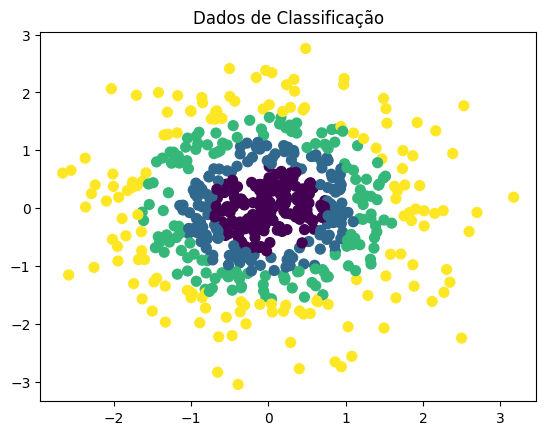

In [66]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Dados de Classificação')

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Tamanho do conjunto de treino: {x_train.shape}')
print(f'Tamanho do conjunto de teste: {x_test.shape}')

Tamanho do conjunto de treino: (480, 2)
Tamanho do conjunto de teste: (120, 2)


# Treinando classificador

In [ ]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

# Parâmetros do classificador
kernel = 4
model = CLog_OVO(kernel=kernel, step=0.005, n_iter=2000, batch_size=1, iterative=True,mode='dual')
# Treinamento
model.fit(x_train, y_train)
# Previsões
y_pred = model.predict(x_test)
# Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
# Plotando os dados de teste e as previsões
plot_decision_boundary(model, x_test, y_test, resolution=500)

Training binary classifiers: 100%|██████████| 6/6 [00:17<00:00,  2.99s/it, Par=2 vs 3]


Acurácia: 0.97


/home/bdlemos/Projetos/Projeto-OML/CLogDKPd_MGmB.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
